In [1]:
import pickle
import numpy as np
import pandas as pd
from pathlib import Path

from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

from utils import CLASSIFIERS
from pate_gans import PATE_GANS

In [2]:
plt.rc('font', size=12)

In [3]:
EPSILONS = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50]

In [4]:
BASE_PATH = Path().resolve().parent / "data" / "results"
SAVE_PLOTS_PATH = BASE_PATH / "plots"

In [5]:
DATASETS = ["credit", "cervical_cancer", "isolet", "epileptic_seizure"]

In [6]:
colors = list(plt.rcParams['axes.prop_cycle'])
COLORS_DICT = {pg_name: colors[idx]["color"] for idx, pg_name in enumerate(PATE_GANS.keys())}

lines = ["-", "--", ":", "-.", (0, (3, 5, 1, 5, 1, 5)), (5, (10, 3))]
LINES_DICT = {pg_name: lines[idx] for idx, pg_name in enumerate(PATE_GANS.keys())}

markers = ["o", "^", "s", "*", "P", "D"]
MARKERS_DICT = {pg_name: markers[idx] for idx, pg_name in enumerate(PATE_GANS.keys())}

In [7]:
def read_data_results(base_path, data_name, drop_real_duplicates=True):
    results_df = pd.read_pickle(base_path / f"{data_name}_results_real.pkl.gz")
    for data_f in base_path.glob(f"{data_name}*.pkl.gz"):
        _results_df = pd.read_pickle(data_f)
        if drop_real_duplicates:
            _results_df = _results_df[_results_df["pg_name"] != "real"]
        results_df = pd.concat([results_df, _results_df], ignore_index=True)

    results_df = results_df.astype({"epsilon": float,
                                    "pg_it": int,
                                    "sd_it": int,
                                    "auroc": float,
                                    "auprc": float})
    return results_df

In [8]:
# real results

In [9]:
_real_means = []
for data_name in DATASETS:
    results_df = read_data_results(BASE_PATH / "utility", data_name)
    real_results_df = results_df[(results_df["pg_name"] == "real") &
                                 (results_df["clf_name"].isin(CLASSIFIERS))]
    print(f"""{data_name}, """
          f"""AUROC: {real_results_df['auroc'].mean():.4f}, """
          f"""AUPRC: {real_results_df['auprc'].mean():.4f}\n\n""")
    _real_means.append(real_results_df['auroc'].mean())

credit, AUROC: 0.8176, AUPRC: 0.5475


cervical_cancer, AUROC: 0.9400, AUPRC: 0.6192


isolet, AUROC: 0.9678, AUPRC: 0.9002


epileptic_seizure, AUROC: 0.8103, AUPRC: 0.7403




In [10]:
# pate-gan results for epsilon 1

In [11]:
_means = []
for data_name in DATASETS:
    results_df = read_data_results(BASE_PATH / "utility", data_name)

    real_majority_results_df = results_df[(results_df["pg_name"] == "real") &
                                          (results_df["clf_name"] == "majority")]
    print(f"""{data_name}, majority, """
      f"""AUROC: {real_majority_results_df['auroc'].to_numpy()[0]:.4f}, """
      f"""AUPRC: {real_majority_results_df['auprc'].to_numpy()[0]:.4f}\n""")        
    for pg_name in PATE_GANS.keys():
        pg_results_df = results_df[(results_df["pg_name"] == pg_name) &
                                   (results_df["epsilon"] == 1)]
        
        _res = np.zeros([len(CLASSIFIERS), 2])
        for i, clf in enumerate(CLASSIFIERS):
            pg_clf_results_df = pg_results_df[results_df["clf_name"] == clf]
            _res[i, :] = [pg_clf_results_df['auroc'].max(), pg_clf_results_df['auprc'].max()]
            if data_name in ["credit", "epileptic_seizure"]:
                print(f"""{data_name}, {pg_name}, {clf}, """
                      f"""AUROC: {_res[i, 0]:.4f}, """
                      f"""AUPRC: {_res[i, 1]:.4f}""")
        print(f"""{data_name}, {pg_name}, average, """
              f"""AUROC: {_res[:, 0].mean():.4f}, """
              f"""AUPRC: {_res[:, 1].mean():.4f}\n""")
        _means.append(_res[:, 0].mean())
    print("\n")

credit, majority, AUROC: 0.5000, AUPRC: 0.0017

credit, PG_ORIGINAL, LogisticRegression, AUROC: 0.5000, AUPRC: 0.0017
credit, PG_ORIGINAL, RandomForest, AUROC: 0.5000, AUPRC: 0.0017
credit, PG_ORIGINAL, GaussianNB, AUROC: 0.5000, AUPRC: 0.0017
credit, PG_ORIGINAL, BernoulliNB, AUROC: 0.5000, AUPRC: 0.0017
credit, PG_ORIGINAL, LinearSVM, AUROC: 0.5000, AUPRC: 0.0017
credit, PG_ORIGINAL, DecisionTree, AUROC: 0.5000, AUPRC: 0.0017
credit, PG_ORIGINAL, LDA, AUROC: 0.5000, AUPRC: 0.0017
credit, PG_ORIGINAL, AdaBoost, AUROC: 0.5000, AUPRC: 0.0017
credit, PG_ORIGINAL, Bagging, AUROC: 0.5000, AUPRC: 0.0017
credit, PG_ORIGINAL, GBM, AUROC: 0.5000, AUPRC: 0.0017
credit, PG_ORIGINAL, MLP, AUROC: 0.5000, AUPRC: 0.0017
credit, PG_ORIGINAL, XGB, AUROC: 0.5000, AUPRC: 0.0017
credit, PG_ORIGINAL, average, AUROC: 0.5000, AUPRC: 0.0017

credit, PG_UPDATED, LogisticRegression, AUROC: 0.5000, AUPRC: 0.0017
credit, PG_UPDATED, RandomForest, AUROC: 0.5000, AUPRC: 0.0017
credit, PG_UPDATED, GaussianNB, AUROC

epileptic_seizure, PG_SMARTNOISE, GBM, AUROC: 0.8235, AUPRC: 0.6892
epileptic_seizure, PG_SMARTNOISE, MLP, AUROC: 0.6267, AUPRC: 0.5601
epileptic_seizure, PG_SMARTNOISE, XGB, AUROC: 0.8194, AUPRC: 0.6846
epileptic_seizure, PG_SMARTNOISE, average, AUROC: 0.6963, AUPRC: 0.5774





In [12]:
# pate-gan `original` w/ conditional generation results for epsilon 1

In [13]:
cond_means = []
pg_name = "PG_ORIGINAL_COND"
for data_name in ["cond_" + data for data in DATASETS]:
    results_df = pd.read_pickle(list((BASE_PATH / "utility").glob(f"{data_name}*.pkl.gz"))[0])
    results_df = results_df.astype({"epsilon": float,
                                    "pg_it": int,
                                    "sd_it": int,
                                    "auroc": float,
                                    "auprc": float})
    pg_results_df = results_df[(results_df["pg_name"] == pg_name) &
                               (results_df["epsilon"] == 1)]
    
    _res = np.zeros([len(CLASSIFIERS), 2])
    for i, clf in enumerate(CLASSIFIERS):
        pg_clf_results_df = pg_results_df[results_df["clf_name"] == clf]
        _res[i, :] = [pg_clf_results_df['auroc'].max(), pg_clf_results_df['auprc'].max()]
#         print(f"""{data_name}, {pg_name}, {clf}, """
#               f"""AUROC: {_res[i, 0]:.4f}, """
#               f"""AUPRC: {_res[i, 1]:.4f}""")
    print(f"""{data_name}, {pg_name}, average, """
          f"""AUROC: {_res[:, 0].mean():.4f}, """
          f"""AUPRC: {_res[:, 1].mean():.4f}\n""")
    cond_means.append(_res[:, 0].mean())
    print("\n")

cond_credit, PG_ORIGINAL_COND, average, AUROC: 0.8760, AUPRC: 0.2711



cond_cervical_cancer, PG_ORIGINAL_COND, average, AUROC: 0.9330, AUPRC: 0.5616



cond_isolet, PG_ORIGINAL_COND, average, AUROC: 0.6927, AUPRC: 0.3557



cond_epileptic_seizure, PG_ORIGINAL_COND, average, AUROC: 0.7029, AUPRC: 0.6072





In [14]:
# pate-gan generation w/ hyperparameters from original paper results for epsilon 1

In [15]:
hyp_means = []
for data_name in ["hyp_" + data for data in DATASETS]:
    results_df = pd.read_pickle(list((BASE_PATH / "utility").glob(f"{data_name}*.pkl.gz"))[0]) 
    
    results_df = results_df.astype({"epsilon": float,
                                    "pg_it": int,
                                    "sd_it": int,
                                    "auroc": float,
                                    "auprc": float})
    
    _res = np.zeros([len(CLASSIFIERS), 2])        
    for pg_name in [f"{pate_gan}_HYP" for pate_gan in PATE_GANS.keys()]:
        pg_results_df = results_df[(results_df["pg_name"] == pg_name) &
                                   (results_df["epsilon"] == 1)]
        
        _res = np.zeros([len(CLASSIFIERS), 2])
        for i, clf in enumerate(CLASSIFIERS):
            pg_clf_results_df = pg_results_df[results_df["clf_name"] == clf]
            _res[i, :] = [pg_clf_results_df['auroc'].max(), pg_clf_results_df['auprc'].max()]
#             print(f"""{data_name}, {pg_name}, {clf}, """
#                   f"""AUROC: {_res[i, 0]:.4f}, """
#                   f"""AUPRC: {_res[i, 1]:.4f}""")
        print(f"""{data_name}, {pg_name}, average, """
              f"""AUROC: {_res[:, 0].mean():.4f}, """
              f"""AUPRC: {_res[:, 1].mean():.4f}\n""")
        hyp_means.append(_res[:, 0].mean())
    print("\n")

hyp_credit, PG_ORIGINAL_HYP, average, AUROC: 0.5000, AUPRC: 0.0017

hyp_credit, PG_UPDATED_HYP, average, AUROC: 0.5000, AUPRC: 0.0017

hyp_credit, PG_SYNTHCITY_HYP, average, AUROC: 0.5437, AUPRC: 0.0192

hyp_credit, PG_TURING_HYP, average, AUROC: 0.5000, AUPRC: 0.0017

hyp_credit, PG_BORAI_HYP, average, AUROC: 0.6616, AUPRC: 0.0431

hyp_credit, PG_SMARTNOISE_HYP, average, AUROC: 0.5867, AUPRC: 0.0591



hyp_cervical_cancer, PG_ORIGINAL_HYP, average, AUROC: 0.8531, AUPRC: 0.4685

hyp_cervical_cancer, PG_UPDATED_HYP, average, AUROC: 0.6581, AUPRC: 0.2824

hyp_cervical_cancer, PG_SYNTHCITY_HYP, average, AUROC: 0.6867, AUPRC: 0.2320

hyp_cervical_cancer, PG_TURING_HYP, average, AUROC: 0.5000, AUPRC: 0.0640

hyp_cervical_cancer, PG_BORAI_HYP, average, AUROC: 0.8140, AUPRC: 0.3796

hyp_cervical_cancer, PG_SMARTNOISE_HYP, average, AUROC: 0.7699, AUPRC: 0.2223



hyp_isolet, PG_ORIGINAL_HYP, average, AUROC: 0.8355, AUPRC: 0.5958

hyp_isolet, PG_UPDATED_HYP, average, AUROC: 0.6001, AUPRC: 0.255

In [16]:
# average utility drop per model from paper across the 4 datasets

In [17]:
paper_means = [0.8737, 0.9108, 0.6399, 0.7681]

In [18]:
average_delta = []
for i, paper_mean in enumerate(paper_means):
    for j in _means[i * len(PATE_GANS): i * len(PATE_GANS) + len(PATE_GANS)]:
        if j > paper_mean:
            average_delta.append((paper_mean - j) / (paper_mean))
        else:
            average_delta.append((paper_mean - j) / (paper_mean - 0.5))

for i in range(len(PATE_GANS)):
    print(list(PATE_GANS.keys())[i], sum(average_delta[i::6])/4)
    
print(f"\nAverage drop {sum(average_delta)/len(average_delta)}")

PG_ORIGINAL 0.24567109239271545
PG_UPDATED 0.507953306089453
PG_SYNTHCITY 0.3375818096683792
PG_TURING 0.773849104600109
PG_BORAI 0.27499084417447356
PG_SMARTNOISE 0.26923238717468545

Average drop 0.401546424016636


In [19]:
# average utility drop for original (conditional) model from paper across the 4 datasets

In [20]:
average_delta = []
for i, paper_mean in enumerate(paper_means):
    if cond_means[i] > paper_mean:
        average_delta.append((paper_mean - cond_means[i]) / (paper_mean))
    else:
        average_delta.append((paper_mean - cond_means[i]) / (paper_mean - 0.5))
print("PG_ORIGINAL_COND", (sum(average_delta) / len(average_delta)))

PG_ORIGINAL_COND 0.03344551642670146


In [21]:
# average utility drop with hyperparameters from paper per model from default hyperparameters across the 4 datasets

In [22]:
average_delta = []
for i, default_mean in enumerate(_means):
    if hyp_means[i] > default_mean:
        average_delta.append((default_mean - hyp_means[i]) / (default_mean))
    else:
        average_delta.append((default_mean - hyp_means[i]) / (default_mean - 0.5 + 1e-10))

for i in range(len(PATE_GANS)):
    print(list(PATE_GANS.keys())[i] + "_HYP", sum(average_delta[i::6])/4)
    
print(f"\nAverage drop {sum(average_delta)/len(average_delta)}")

PG_ORIGINAL_HYP 0.04229253143036218
PG_UPDATED_HYP 0.13685653781641974
PG_SYNTHCITY_HYP 0.17780165431057757
PG_TURING_HYP 0.2499999998969175
PG_BORAI_HYP 0.20491633600170414
PG_SMARTNOISE_HYP 0.24095199029904962

Average drop 0.17546984162583848


In [23]:
# pate-gan plots for varying levels of epsilon

In [24]:
def fix_label(label):
    if label in ["ORIGINAL"]:
        return r"${\tt original}$"
    elif label in ["UPDATED", "updated"]:
        return r"${\tt updated}$"
    elif label in ["SYNTHCITY", "synthcity"]:
        return r"${\tt synthcity}$"
    elif label in ["TURING", "turing"]:
        return r"${\tt turing}$"
    elif label in ["BORAI", "borai", "borealisai"]:
        return r"${\tt borealis}$"
    elif label in ["SMARTNOISE", "smartnoise"]:
        return r"${\tt smartnoise}$"

In [25]:
data_name = "epileptic_seizure"
results_df = read_data_results(BASE_PATH / "utility", data_name)

data_results = {}
data_results_mean_std = {}
majority = results_df[(results_df["pg_name"] == "real") &
                      (results_df["clf_name"] == "majority")]
data_results["baseline"] = {"auroc": float(majority["auroc"]), "auprc": float(majority["auprc"])}

if data_name == "credit":
    data_results["paper"] = {"auroc": [0.675, 0.755, 0.820, 0.855, 0.870, 0.875, 0.880, 0.885],
                             "auprc": [0.075, 0.150, 0.250, 0.325, 0.330, 0.340, 0.345, 0.345]}
elif data_name == "cervical_cancer":
    data_results["paper"] = {"auroc": [np.nan, np.nan, np.nan, np.nan, 0.910, np.nan, np.nan, np.nan],
                             "auprc": [np.nan, np.nan, np.nan, np.nan, 0.550, np.nan, np.nan, np.nan]}
elif data_name == "epileptic_seizure":
    data_results["paper"] = {"auroc": [np.nan, np.nan, np.nan, np.nan, 0.765, np.nan, 0.870, np.nan],
                             "auprc": [np.nan, np.nan, np.nan, np.nan, 0.650, np.nan, 0.765, np.nan]}
    
y_lim_dict = {"credit": {"auroc": 0.21, "auprc": None},
              "epileptic_seizure":  {"auroc": 0.32, "auprc": -0.07},
              "cervical_cancer":  {"auroc": 0.25, "auprc": None}}

for pg_name in PATE_GANS.keys():
    data_results[pg_name] = {"auroc": [], "auprc": []}
    data_results_mean_std[pg_name] = {"mean": [], "std": []}
    for epsilon in EPSILONS:
        pg_eps_results_df = results_df[(results_df["pg_name"] == pg_name) &
                                       (results_df["epsilon"] == epsilon)]
        
        
        _res = np.zeros([len(CLASSIFIERS), 2])
        _res_all_auroc = []
        for i, clf in enumerate(CLASSIFIERS):
            pg_eps_clf_results_df = pg_eps_results_df[(pg_eps_results_df["clf_name"] == clf)]
            _res[i, :] = [pg_eps_clf_results_df['auroc'].max(), pg_eps_clf_results_df['auprc'].max()]
            _res_all_auroc.append(list(pg_eps_clf_results_df['auroc']))

        data_results[pg_name]["auroc"].append(_res[:, 0].mean())
        data_results[pg_name]["auprc"].append(_res[:, 1].mean())
        data_results_mean_std[pg_name]["mean"].append(np.array(_res_all_auroc).mean())
        data_results_mean_std[pg_name]["std"].append(np.array(_res_all_auroc).std(ddof=1) / np.sqrt(len(_res_all_auroc)))

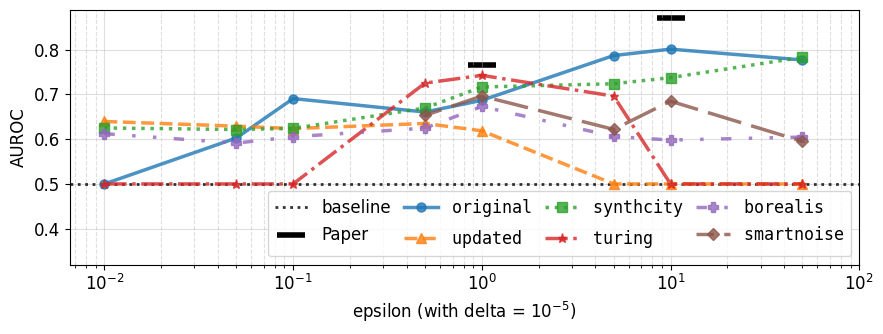

In [26]:
metric = "auroc"


fig, ax = plt.subplots(1, figsize=(9, 3.5), layout='tight', squeeze=True)
alpha = 0.8

ax.axhline(y=data_results["baseline"][metric],
           color='black',
           linestyle=':',
           linewidth=2,
           alpha=alpha,
           label="baseline")

ax.scatter(EPSILONS,
           data_results["paper"][metric],
           color='black',
           marker="_",
           s=400,
           linewidths=4,
           label="Paper")

for pg_name in PATE_GANS.keys():
    ax.plot(EPSILONS,
            data_results[pg_name][metric],
            ls=LINES_DICT[pg_name],
            marker=MARKERS_DICT[pg_name],
            color=COLORS_DICT[pg_name],
            linewidth=2.5,
            markersize=6.5,
            label=fix_label(pg_name.split("_")[1]),
            alpha=alpha)

ax.set_xscale("log")
ax.set_xlim(xmax=100)
ax.set_ylim(ymin=y_lim_dict[data_name][metric])
# ax.set_ylim(ymin=0)
ax.set_xlabel(r"epsilon (with delta = $10^{-5}$)")
ax.set_ylabel(metric.upper())
ax.grid(True, which="minor", linestyle="dashed", alpha=0.4)
ax.grid(True, which="major", linestyle="-", alpha=0.4)
ax.legend(ncol=4, loc=4, columnspacing=0.8)
# ax.legend(ncol=2, loc=2, columnspacing=0.8)

fig.tight_layout()
# fig.savefig(SAVE_PLOTS_PATH / f"{data_name}_{metric}.pdf", bbox_inches='tight')
fig.show()

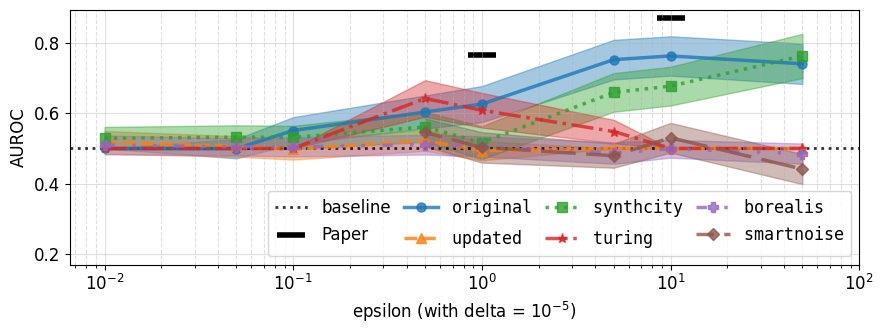

In [27]:
metric = "auroc"


fig, ax = plt.subplots(1, figsize=(9, 3.5), layout='tight', squeeze=True)
alpha = 0.8

ax.axhline(y=data_results["baseline"][metric],
           color='black',
           linestyle=':',
           linewidth=2,
           alpha=alpha,
           label="baseline")

ax.scatter(EPSILONS,
           data_results["paper"][metric],
           color='black',
           marker="_",
           s=400,
           linewidths=4,
           label="Paper")

for pg_name in PATE_GANS.keys():
    ax.plot(EPSILONS,
            data_results_mean_std[pg_name]["mean"],
            ls=LINES_DICT[pg_name],
            marker=MARKERS_DICT[pg_name],
            color=COLORS_DICT[pg_name],
            linewidth=2.5,
            markersize=6.5,
            label=fix_label(pg_name.split("_")[1]),
            alpha=alpha)
    
    ax.fill_between(EPSILONS,
                    np.array(data_results_mean_std[pg_name]["mean"]) - np.array(data_results_mean_std[pg_name]["std"]),
                    np.array(data_results_mean_std[pg_name]["mean"]) + np.array(data_results_mean_std[pg_name]["std"]),
                    color=COLORS_DICT[pg_name],
                    alpha=alpha/2)

ax.set_xscale("log")
ax.set_xlim(xmax=100)
# ax.set_ylim(ymin=y_lim_dict[data_name][metric])
ax.set_ylim(ymin=0.17)
# ax.set_ylim(ymin=0)
ax.set_xlabel(r"epsilon (with delta = $10^{-5}$)")
ax.set_ylabel(metric.upper())
ax.grid(True, which="minor", linestyle="dashed", alpha=0.4)
ax.grid(True, which="major", linestyle="-", alpha=0.4)
ax.legend(ncol=4, loc=4, columnspacing=0.8)
# ax.legend(ncol=2, loc=2, columnspacing=0.8)

fig.tight_layout()
# fig.savefig(SAVE_PLOTS_PATH / f"{data_name}_{metric}_mean_std.pdf", bbox_inches='tight')
fig.show()

In [28]:
results_path = BASE_PATH / "utility" / "epileptic_seizure_results_1_teachers.pkl.gz"
results_df = pd.read_pickle(results_path)
results_df

,df_name,pg_name,epsilon,num_teachers,pg_it,sd_it,LogisticRegression_aucroc,RandomForest_aucroc,GaussianNB_aucroc,BernoulliNB_aucroc,LinearSVM_aucroc,DecisionTree_aucroc,LDA_aucroc,AdaBoost_aucroc,Bagging_aucroc,GBM_aucroc,MLP_aucroc,XGB_aucroc
0,epileptic_seizure,PG_UPDATED,1,184,0,0,0.492968,0.583734,0.458693,0.496739,0.499465,0.614402,0.498875,0.710493,0.482300,0.561133,0.441274,0.508064
1,epileptic_seizure,PG_UPDATED,1,184,0,1,0.481659,0.333570,0.458173,0.506522,0.481323,0.395380,0.483660,0.372037,0.829860,0.491762,0.455263,0.344084
2,epileptic_seizure,PG_UPDATED,1,184,0,2,0.482750,0.762151,0.477515,0.508696,0.485308,0.653261,0.482899,0.561935,0.742808,0.484610,0.482597,0.546667
3,epileptic_seizure,PG_UPDATED,1,184,1,0,0.516538,0.347489,0.505110,0.511957,0.515887,0.378261,0.517935,0.117538,0.325942,0.159618,0.454262,0.323526
4,epileptic_seizure,PG_UPDATED,1,184,1,1,0.515620,0.314684,0.530874,0.496739,0.514725,0.424185,0.517547,0.419929,0.447800,0.461477,0.520735,0.495432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,epileptic_seizure,PG_SMARTNOISE,1,2,1,1,0.497507,0.146198,0.447706,0.348496,0.502247,0.336413,0.490204,0.413458,0.210549,0.470200,0.469051,0.336282
176,epileptic_seizure,PG_SMARTNOISE,1,2,1,2,0.491425,0.485369,0.462038,0.345223,0.493698,0.348913,0.483885,0.521866,0.305152,0.561059,0.484581,0.380045
177,epileptic_seizure,PG_SMARTNOISE,1,2,2,0,0.463670,0.700852,0.384384,0.506761,0.462319,0.642663,0.484955,0.680005,0.621956,0.699291,0.456536,0.590626
178,epileptic_seizure,PG_SMARTNOISE,1,2,2,1,0.458913,0.564382,0.382493,0.490004,0.454062,0.658152,0.470020,0.701017,0.722237,0.655578,0.400743,0.747580


In [29]:
results_df = results_df.drop(columns=["df_name", "epsilon", "pg_it", "sd_it"])
summary_df = results_df.groupby(["pg_name", "num_teachers"]).max()
summary_df["mean_aucroc"] = summary_df.mean(axis=1)
summary_df = summary_df.drop(columns=list(summary_df.columns[:-1]))
summary_df = summary_df.reset_index()

In [30]:
summary_df.pivot(index='pg_name', columns='num_teachers', values='mean_aucroc').loc[["PG_UPDATED", "PG_SYNTHCITY", "PG_BORAI", "PG_SMARTNOISE"], [184, 92, 18, 2]]


num_teachers,184,92,18,2
pg_name,,,,
PG_UPDATED,0.617036,0.594436,0.607675,0.618023
PG_SYNTHCITY,0.622959,0.644655,0.664301,0.642797
PG_BORAI,0.617001,0.623005,0.633203,0.636269
PG_SMARTNOISE,0.662538,0.627517,0.665256,0.626952


In [31]:
# pate-gan plots for varying non-overlapping subsets of data for teachers

In [32]:
teachers_seen_path = BASE_PATH / "audit" / "cervical_cancer_teachers_seen.pickle"

In [33]:
with open(teachers_seen_path, 'rb') as f:
    teachers_results = pickle.load(f)

In [34]:
teachers_results.keys()
del teachers_results["PG_ORIGINAL_AUDIT"]
del teachers_results["PG_TURING_AUDIT"]

In [35]:
n_teachers = 5

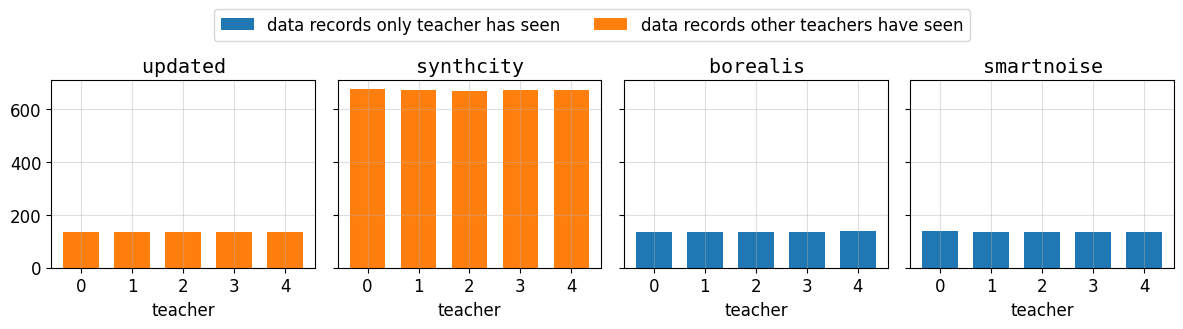

In [36]:
fig, axes = plt.subplots(ncols=4, figsize=(12, 3), sharey=True, layout='tight', squeeze=True)
alpha = 0.8
width = 0.7

for i, (pg_name, pg_data) in enumerate(teachers_results.items()):
    teach_dict = {}
    for teach_idx in range(n_teachers):
        teach_data = pg_data[teach_idx]
        other_teach_data = set()
        for _idx in range(n_teachers):
            if _idx != teach_idx:
                other_teach_data.update(pg_data[_idx])
        
        teach_only = teach_data.difference(other_teach_data)
        teach_shared = teach_data.intersection(other_teach_data)
        
        teach_dict[teach_idx] = {"only": len(teach_only),
                                 "shared": len(teach_shared)}
        
    zeros = np.zeros(n_teachers)
    only = np.array([teach_dict[_idx]["only"] for _idx in range(n_teachers)])
    shared = np.array([teach_dict[_idx]["shared"] for _idx in range(n_teachers)])
    
    if i == 0:
        axes[i].bar(range(n_teachers), only, width, label="data records only teacher has seen", bottom=zeros, color=colors[0]["color"])
        axes[i].bar(range(n_teachers), shared, width, label="data records other teachers have seen", bottom=only, color=colors[1]["color"])
    else:
        axes[i].bar(range(n_teachers), only, width, bottom=zeros, color=colors[0]["color"])
        axes[i].bar(range(n_teachers), shared, width, bottom=only, color=colors[1]["color"])
    
    axes[i].set_xticks(range(n_teachers))
    axes[i].set_xlabel("teacher")

    axes[i].set_title(f"{fix_label(pg_name.split('_')[1])}")
    
    axes[i].grid(True, which="minor", linestyle="dashed", alpha=0.4)
    axes[i].grid(True, which="major", linestyle="-", alpha=0.4)

    
fig.legend(ncol=2, loc='upper center', bbox_to_anchor=[0.5, 1.12])
fig.tight_layout()
# fig.savefig(SAVE_PLOTS_PATH / "teachers_data_seen.pdf", bbox_inches='tight')
fig.show()

In [37]:
# pate-gan plots for teachers losses

In [38]:
teachers_path = BASE_PATH / "audit" / "cervical_cancer_teachers_loss.pickle"

In [39]:
with open(teachers_path, 'rb') as f:
    teachers_results = pickle.load(f)

In [40]:
teachers_results.keys()

dict_keys(['PG_UPDATED_AUDIT', 'PG_SYNTHCITY_AUDIT', 'PG_BORAI_AUDIT', 'PG_SMARTNOISE_AUDIT'])

In [41]:
n_teachers = 5

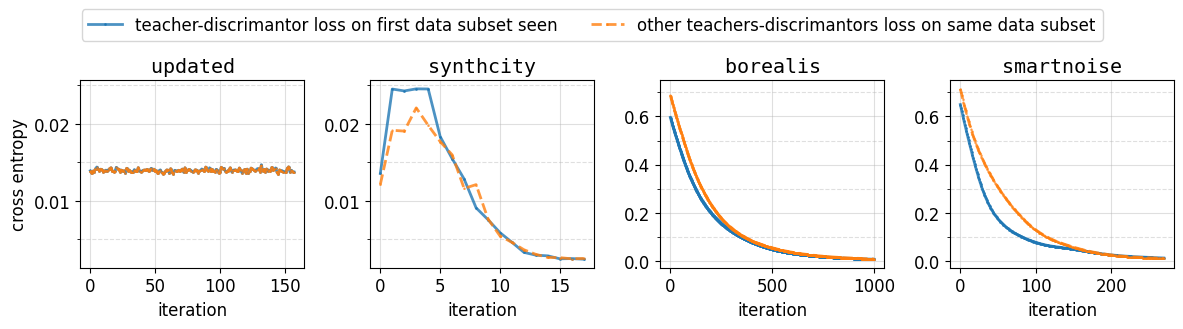

In [42]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3), layout='tight', squeeze=True)
alpha = 0.8

x = np.arange(1000)

for ax_i, pg_name in enumerate(teachers_results.keys()):
    i = 0
    ys0 = teachers_results[pg_name][i][:, i]
    ys0 = ys0[ys0 != 0]

    if ax_i == 0:
        axes[ax_i].plot(x[:len(ys0)],
                        ys0,
                        ls=lines[0],
                        marker=markers[0],
                        color=colors[0]["color"],
                        linewidth=2,
                        markersize=1,
                        label="teacher-discrimantor loss on first data subset seen",
                        alpha=alpha)
    else:
        axes[ax_i].plot(x[:len(ys0)],
                        ys0,
                        ls=lines[0],
                        marker=markers[0],
                        color=colors[0]["color"],
                        linewidth=2,
                        markersize=1,
                        alpha=alpha)

    ys1 = np.concatenate(([teachers_results[pg_name][j][:, j].reshape(-1, 1) for j in range(n_teachers) if j != i]), axis=1).mean(axis=1)
    ys1 = ys1[ys1 != 0]

    if ax_i == 0:
        axes[ax_i].plot(x[:len(ys1)],
                          ys1,
                          ls=lines[1],
                          marker=markers[1],
                          color=colors[1]["color"],
                          linewidth=2,
                          markersize=1,
                          label="other teachers-discrimantors loss on same data subset",
                          alpha=alpha)
    else:
        axes[ax_i].plot(x[:len(ys1)],
                          ys1,
                          ls=lines[1],
                          marker=markers[1],
                          color=colors[1]["color"],
                          linewidth=2,
                          markersize=1,
                          alpha=alpha)

    axes[ax_i].grid(True, which="minor", linestyle="dashed", alpha=0.4)
    axes[ax_i].grid(True, which="major", linestyle="-", alpha=0.4)
    if ax_i == 0:
        axes[ax_i].set_ylabel("cross entropy")
    if ax_i == 1:
        axes[ax_i].sharey(axes[ax_i - 1])
        axes[ax_i].yaxis.set_major_locator(MultipleLocator(0.01))
        axes[ax_i].yaxis.set_minor_locator(MultipleLocator(0.005))
    if ax_i == 3:
        axes[ax_i].sharey(axes[ax_i - 1])
        axes[ax_i].yaxis.set_major_locator(MultipleLocator(0.2))
        axes[ax_i].yaxis.set_minor_locator(MultipleLocator(0.1))
        
    axes[ax_i].set_xlabel("iteration")

    axes[ax_i].set_title(f"{fix_label(pg_name.split('_')[1])}")
    

fig.legend(ncol=2, loc='upper center', bbox_to_anchor=[0.5, 1.12])
fig.tight_layout()
# fig.savefig(SAVE_PLOTS_PATH / "teachers_data.pdf", bbox_inches='tight')
fig.show()

In [43]:
teachers_path = BASE_PATH / "audit" / "cervical_cancer_teachers_losses.pickle"

In [44]:
with open(teachers_path, 'rb') as f:
    teachers_results = pickle.load(f)

In [45]:
teachers_results.keys()

dict_keys(['PG_UPDATED_AUDIT', 'PG_SYNTHCITY_AUDIT', 'PG_BORAI_AUDIT', 'PG_SMARTNOISE_AUDIT'])

In [46]:
n_teachers = 5
iters = 10

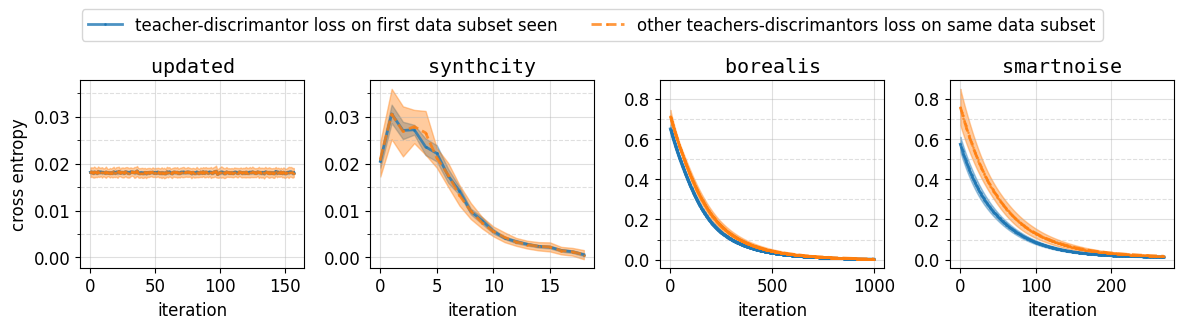

In [47]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3), layout='tight', squeeze=True)
alpha = 0.8

x = np.arange(1000)

for ax_i, pg_name in enumerate(teachers_results.keys()):
    i = 0    
    ys0s = []
    ys1s = []
    for itr in range(iters):
        ys0s.append(teachers_results[pg_name][itr][i][:, i])

        ys1 = np.concatenate(([teachers_results[pg_name][itr][j][:, j].reshape(-1, 1) for j in range(n_teachers) if j != i]), axis=1).mean(axis=1)
        ys1s.append(ys1)

    ys0s = np.asarray(ys0s)
    ys0s_mean = ys0s.mean(axis=0)
    ys0s_mean = ys0s_mean[ys0s_mean != 0]
    ys0s_std = ys0s.std(axis=0)[:len(ys0s_mean)] / np.sqrt(len(ys0s[:len(ys0s_mean)]))
    
    ys1s = np.asarray(ys1s)
    ys1s_mean = ys1s.mean(axis=0)
    ys1s_mean = ys1s_mean[ys1s_mean != 0]
    ys1s_std = ys1s.std(axis=0)[:len(ys1s_mean)]
    
    if ax_i == 0:
        axes[ax_i].plot(x[:len(ys0s_mean)],
                        ys0s_mean,
                        ls=lines[0],
                        marker=markers[0],
                        color=colors[0]["color"],
                        linewidth=2,
                        markersize=1,
                        label="teacher-discrimantor loss on first data subset seen",
                        alpha=alpha)
    else:
        axes[ax_i].plot(x[:len(ys0s_mean)],
                        ys0s_mean,
                        ls=lines[0],
                        marker=markers[0],
                        color=colors[0]["color"],
                        linewidth=2,
                        markersize=1,
                        alpha=alpha)
        
    axes[ax_i].fill_between(x[:len(ys0s_mean)],
                            ys0s_mean - ys0s_std,
                            ys0s_mean + ys0s_std,
                            color=colors[0]["color"],
                            alpha=alpha/2)

    if ax_i == 0:
        axes[ax_i].plot(x[:len(ys1s_mean)],
                          ys1s_mean,
                          ls=lines[1],
                          marker=markers[1],
                          color=colors[1]["color"],
                          linewidth=2,
                          markersize=1,
                          label="other teachers-discrimantors loss on same data subset",
                          alpha=alpha)
    else:
        axes[ax_i].plot(x[:len(ys1s_mean)],
                          ys1s_mean,
                          ls=lines[1],
                          marker=markers[1],
                          color=colors[1]["color"],
                          linewidth=2,
                          markersize=1,
                          alpha=alpha)

    axes[ax_i].fill_between(x[:len(ys1s_mean)],
                        ys1s_mean - ys1s_std,
                        ys1s_mean + ys1s_std,
                        color=colors[1]["color"],
                        alpha=alpha/2)

    axes[ax_i].grid(True, which="minor", linestyle="dashed", alpha=0.4)
    axes[ax_i].grid(True, which="major", linestyle="-", alpha=0.4)
    if ax_i == 0:
        axes[ax_i].set_ylabel("cross entropy")
    if ax_i == 1:
        axes[ax_i].sharey(axes[ax_i - 1])
        axes[ax_i].yaxis.set_major_locator(MultipleLocator(0.01))
        axes[ax_i].yaxis.set_minor_locator(MultipleLocator(0.005))
    if ax_i == 3:
        axes[ax_i].sharey(axes[ax_i - 1])
        axes[ax_i].yaxis.set_major_locator(MultipleLocator(0.2))
        axes[ax_i].yaxis.set_minor_locator(MultipleLocator(0.1))
        
    axes[ax_i].set_xlabel("iteration")

    axes[ax_i].set_title(f"{fix_label(pg_name.split('_')[1])}")
    

fig.legend(ncol=2, loc='upper center', bbox_to_anchor=[0.5, 1.12])
fig.tight_layout()
# fig.savefig(SAVE_PLOTS_PATH / "teachers_data_10.pdf", bbox_inches='tight')
fig.show()

In [48]:
# pate-gan plots for moment accounting

In [49]:
momnets_path = BASE_PATH / "audit" / "cervical_cancer_moments.pickle"

In [50]:
with open(momnets_path, 'rb') as f:
    momnets_results = pickle.load(f)

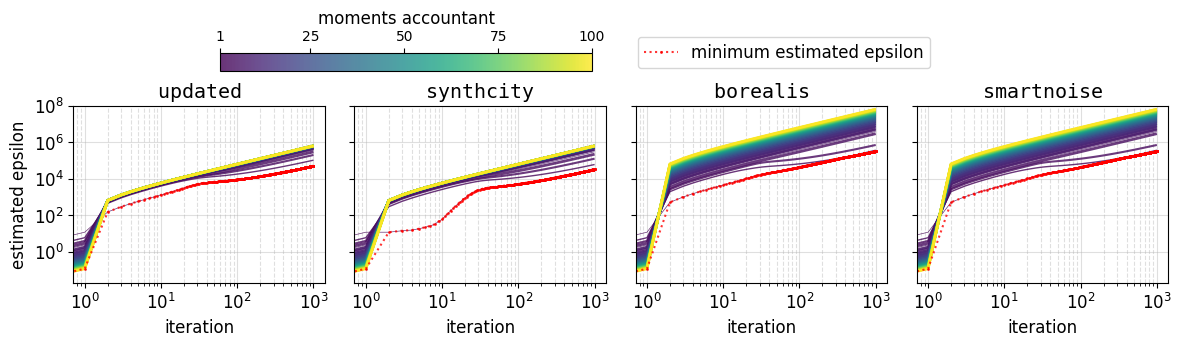

In [51]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3.7), layout='tight', sharey=True, squeeze=True)
alpha = 0.8

x = np.arange(1001)

for i, pg_name in enumerate(["PG_UPDATED", "PG_SYNTHCITY", "PG_BORAI", "PG_SMARTNOISE"]):
    segs = [np.column_stack([x, y]) for y in momnets_results["epsilons"][pg_name].T]
    line_segments = LineCollection(segs, array=np.arange(1, 101),
                                   linewidths=(0.5, 1, 1.5, 2),
                                   linestyles='solid',
                                   alpha=alpha)
    axes[i].add_collection(line_segments)

    if i == 0:
        axes[i].plot(x,
                     momnets_results["epsilons"][pg_name].min(axis=1),
                     ls=":",
                     marker="o",
                     color="red",
                     linewidth=1.5,
                     markersize=1,
                     label="minimum estimated epsilon",
                     alpha=alpha)

    else:
        axes[i].plot(x,
                     momnets_results["epsilons"][pg_name].min(axis=1),
                     ls=":",
                     marker="o",
                     color="red",
                     linewidth=1.5,
                     markersize=1,
                     alpha=alpha)
    
    axes[i].set_ylim(top=10**8)
    axes[i].set_yscale("log")
    axes[i].set_xscale("log")

    axes[i].grid(True, which="minor", linestyle="dashed", alpha=0.4)
    axes[i].grid(True, which="major", linestyle="-", alpha=0.4)
    
    if i == 0:
        axes[i].set_ylabel("estimated epsilon")
    axes[i].set_xlabel("iteration")
    axes[i].set_title(fix_label(pg_name.split("_")[1]))

cbar = fig.colorbar(line_segments,
                    ax=axes,
                    orientation="horizontal",
                    ticks=[1, 25, 50, 75, 100],
                    shrink=0.4,
                    pad=-0.425,
                    location="top",
                    anchor=(0.14, 0.0))
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label="moments accountant", size=12)

fig.legend(loc='upper center', bbox_to_anchor=[0.66, 0.88])
fig.tight_layout()
# fig.savefig(SAVE_PLOTS_PATH / "moments_data.pdf", bbox_inches='tight')
fig.show()

In [52]:
# fig, ax = plt.subplots(1, figsize=(5, 3), layout='tight', squeeze=True)
# alpha = 0.8

# x = np.arange(1001)

# for i, pg_name in enumerate(["PG_UPDATED", "PG_SYNTHCITY", "PG_BORAI", "PG_SMARTNOISE"]):
#     ax.plot(x,
#             momnets_results["epsilons"][pg_name].min(axis=1),
#             ls=LINES_DICT[pg_name],
#             marker=MARKERS_DICT[pg_name],
#             color=COLORS_DICT[pg_name],
#             linewidth=3,
#             markersize=1,
#             label=fix_label(pg_name.split("_")[1]),
#             alpha=alpha)

# ax.grid(True, which="minor", linestyle="dashed", alpha=0.4)
# ax.grid(True, which="major", linestyle="-", alpha=0.4)

# ax.legend(loc=2, columnspacing=0.8, fontsize=10)

# ax.set_xlabel("iteration")
# ax.set_ylabel("estimated epsilon")
# ax.yaxis.set_major_locator(MultipleLocator(50000))
# ax.yaxis.set_minor_locator(MultipleLocator(10000))

# current_values = ax.get_yticks()
# ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
# labels = [x.get_text().replace(",000", "k") for x in ax.get_yticklabels()]
# ax.set_yticklabels(labels)

# fig.tight_layout()
# fig.savefig(SAVE_PLOTS_PATH / "moments_data.pdf", bbox_inches='tight')
# fig.show()

In [53]:
# pate-gan plots for auditing epsilon  bb -- worst

In [54]:
audit_path = BASE_PATH / "audit" / "worst_data_audit_bb.pkl.gz"

In [55]:
results_df = pd.read_pickle(audit_path)

In [56]:
results_df

,df_name,pg_name,epsilon,auc,emp_eps_approxdp
0,in_out_data,PG_ORIGINAL_AUDIT,1,1.000000,4.681517
1,in_out_data,PG_UPDATED_AUDIT,1,0.785690,2.178210
2,in_out_data,PG_SYNTHCITY_AUDIT,1,1.000000,4.681517
3,in_out_data,PG_TURING_AUDIT,1,1.000000,4.681517
4,in_out_data,PG_BORAI_AUDIT,1,0.988492,4.534262
5,in_out_data,PG_SMARTNOISE_AUDIT,1,1.000000,4.681517


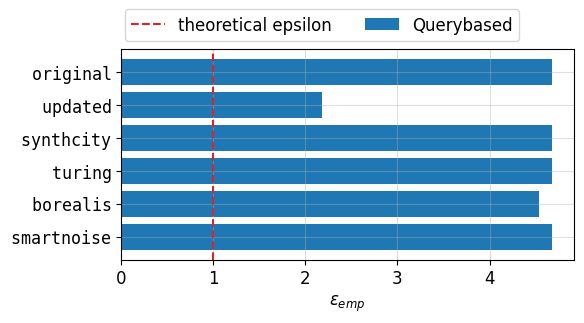

In [57]:
fig, ax = plt.subplots(1, figsize=(6, 3), layout='tight', squeeze=True)

y_pos = range(len(results_df["pg_name"]))
ax.barh(y_pos, results_df["emp_eps_approxdp"], align="center", color=colors[0]["color"], label="Querybased")
ax.axvline(x=1, color=colors[3]["color"], ls="--", label='theoretical epsilon')

# ax.set_xscale("log")
ax.set_xlabel(r"$\epsilon_{emp}$")
ax.invert_yaxis()
ax.set_yticks(y_pos, labels=[fix_label(pg.split("_")[1]) for pg in results_df["pg_name"]])
ax.grid(True, which="minor", linestyle="dashed", alpha=0.4)
ax.grid(True, which="major", linestyle="-", alpha=0.4)

fig.legend(ncol=2, loc='upper center', bbox_to_anchor=[0.55, 1.1])
fig.tight_layout()
# fig.savefig(SAVE_PLOTS_PATH / "empirical_epsilon_worst_bb.pdf", bbox_inches='tight')
fig.show()

In [58]:
audit_path = BASE_PATH / "audit" / "worst_data_audit_bb_zb.pkl.gz"

In [59]:
results_df_zb = pd.read_pickle(audit_path)

In [60]:
results_df_zb

,df_name,pg_name,epsilon,auc,emp_eps_approxdp
0,worst_data,PG_ORIGINAL_AUDIT,1,1.000000,5.202155
1,worst_data,PG_UPDATED_AUDIT,1,0.809265,1.849510
2,worst_data,PG_SYNTHCITY_AUDIT,1,1.000000,5.202155
3,worst_data,PG_TURING_AUDIT,1,1.000000,5.202155
4,worst_data,PG_BORAI_AUDIT,1,0.990081,3.213505
5,worst_data,PG_SMARTNOISE_AUDIT,1,1.000000,5.202155


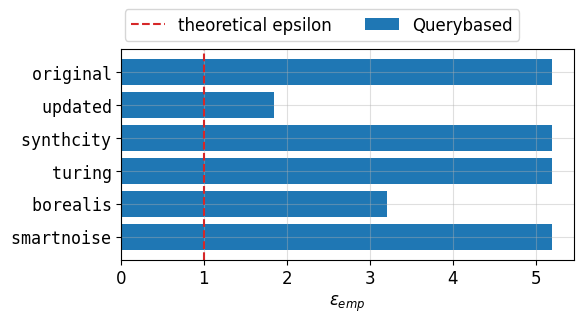

In [61]:
fig, ax = plt.subplots(1, figsize=(6, 3), layout='tight', squeeze=True)

y_pos = range(len(results_df_zb["pg_name"]))
ax.barh(y_pos, results_df_zb["emp_eps_approxdp"], align="center", color=colors[0]["color"], label="Querybased")
ax.axvline(x=1, color=colors[3]["color"], ls="--", label='theoretical epsilon')

# ax.set_xscale("log")
ax.set_xlabel(r"$\epsilon_{emp}$")
ax.invert_yaxis()
ax.set_yticks(y_pos, labels=[fix_label(pg.split("_")[1]) for pg in results_df_zb["pg_name"]])
ax.grid(True, which="minor", linestyle="dashed", alpha=0.4)
ax.grid(True, which="major", linestyle="-", alpha=0.4)

fig.legend(ncol=2, loc='upper center', bbox_to_anchor=[0.55, 1.1])
fig.tight_layout()
# fig.savefig(SAVE_PLOTS_PATH / "empirical_epsilon_worst_bb_zb.pdf", bbox_inches='tight')
fig.show()

In [62]:
(results_df["emp_eps_approxdp"] < results_df_zb["emp_eps_approxdp"]).sum()

4

In [63]:
# pate-gan plots for auditing epsilon bb -- average

In [64]:
audit_path = BASE_PATH / "audit" / "cervical_cancer_audit_bb.pkl.gz"

In [65]:
results_df = pd.read_pickle(audit_path)

In [66]:
results_df

,df_name,pg_name,epsilon,naive_auc,naive_emp_eps_approxdp,hist_auc,hist_emp_eps_approxdp,corr_auc,corr_emp_eps_approxdp,ens_auc,ens_emp_eps_approxdp
0,cervical_cancer,PG_ORIGINAL_AUDIT,1,0.975008,3.427493,0.980608,4.223416,0.538150,0.0,0.968558,3.844536
1,cervical_cancer,PG_UPDATED_AUDIT,1,1.000000,4.681517,1.000000,4.676793,0.538154,0.0,1.000000,4.672632
2,cervical_cancer,PG_SYNTHCITY_AUDIT,1,1.000000,3.897516,1.000000,0.000000,1.000000,0.0,1.000000,0.000000
3,cervical_cancer,PG_TURING_AUDIT,1,0.732594,2.047403,0.726069,2.048557,0.477325,0.0,0.710881,2.047403
4,cervical_cancer,PG_BORAI_AUDIT,1,0.982817,4.627696,0.990493,4.624443,0.490429,0.0,0.981993,4.627696
5,cervical_cancer,PG_SMARTNOISE_AUDIT,1,1.000000,4.681517,1.000000,4.681517,0.526683,0.0,1.000000,4.676793


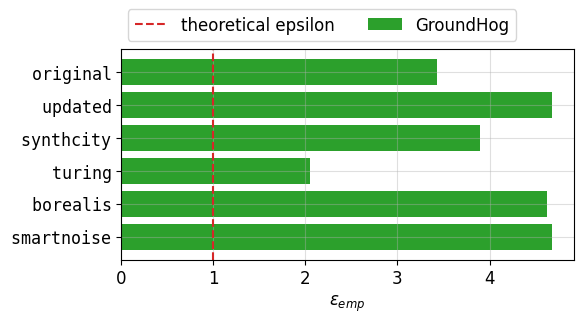

In [67]:
fig, ax = plt.subplots(1, figsize=(6, 3), layout='tight', squeeze=True)

y_pos = range(len(results_df["pg_name"]))
ax.barh(y_pos, results_df["naive_emp_eps_approxdp"], align="center", color=colors[2]["color"], label="GroundHog")
ax.axvline(x=1, color=colors[3]["color"], ls="--", label='theoretical epsilon')

# ax.set_xscale("log")
ax.set_xlabel(r"$\epsilon_{emp}$")
ax.invert_yaxis()
ax.set_yticks(y_pos, labels=[fix_label(pg.split("_")[1]) for pg in results_df["pg_name"]])
ax.grid(True, which="minor", linestyle="dashed", alpha=0.4)
ax.grid(True, which="major", linestyle="-", alpha=0.4)

fig.legend(ncol=2, loc='upper center', bbox_to_anchor=[0.55, 1.1])
fig.tight_layout()
# fig.savefig(SAVE_PLOTS_PATH / "empirical_epsilon_average_bb.pdf", bbox_inches='tight')
fig.show()

In [68]:
audit_path = BASE_PATH / "audit" / "cervical_cancer_audit_bb_zb.pkl.gz"

In [69]:
results_df_zb = pd.read_pickle(audit_path)

In [70]:
results_df_zb

,df_name,pg_name,epsilon,naive_auc,naive_emp_eps_approxdp
0,cervical_cancer,PG_ORIGINAL_AUDIT,1,0.963557,3.489749
1,cervical_cancer,PG_UPDATED_AUDIT,1,1.000000,4.690909
2,cervical_cancer,PG_SYNTHCITY_AUDIT,1,1.000000,4.750803
3,cervical_cancer,PG_TURING_AUDIT,1,0.956294,2.835884
4,cervical_cancer,PG_BORAI_AUDIT,1,0.988053,4.598487
5,cervical_cancer,PG_SMARTNOISE_AUDIT,1,1.000000,5.202155


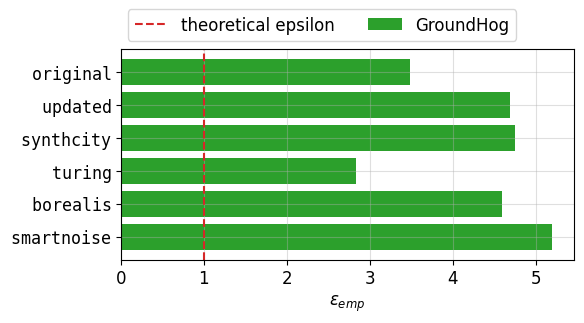

In [71]:
fig, ax = plt.subplots(1, figsize=(6, 3), layout='tight', squeeze=True)

y_pos = range(len(results_df_zb["pg_name"]))
ax.barh(y_pos, results_df_zb["naive_emp_eps_approxdp"], align="center", color=colors[2]["color"], label="GroundHog")
ax.axvline(x=1, color=colors[3]["color"], ls="--", label='theoretical epsilon')

# ax.set_xscale("log")
ax.set_xlabel(r"$\epsilon_{emp}$")
ax.invert_yaxis()
ax.set_yticks(y_pos, labels=[fix_label(pg.split("_")[1]) for pg in results_df_zb["pg_name"]])
ax.grid(True, which="minor", linestyle="dashed", alpha=0.4)
ax.grid(True, which="major", linestyle="-", alpha=0.4)

fig.legend(ncol=2, loc='upper center', bbox_to_anchor=[0.55, 1.1])
fig.tight_layout()
# fig.savefig(SAVE_PLOTS_PATH / "empirical_epsilon_average_bb_zb.pdf", bbox_inches='tight')
fig.show()

In [72]:
(results_df["naive_emp_eps_approxdp"] < results_df_zb["naive_emp_eps_approxdp"]).sum()

5

In [73]:
MNIST_EPSILONS = [0.01, 0.1, 1, 10]
MNIST_CLASSIFIERS = ["LogisticRegression", "RandomForest"]

In [74]:
data_name = "mnist"
results_df = read_data_results(BASE_PATH / "utility", data_name)
real_results_df = results_df[(results_df["pg_name"] == "real") &
                             (results_df["clf_name"].isin(MNIST_CLASSIFIERS))]
print(f"""{data_name}, """
      f"""AUROC: {real_results_df['auroc'].mean():.4f}, """
      f"""AUPRC: {real_results_df['auprc'].mean():.4f}\n\n""")
real_mean = real_results_df['auroc'].mean()

mnist, AUROC: 0.9960, AUPRC: 0.9792




In [75]:
_means = []
results_df = read_data_results(BASE_PATH / "utility", data_name)

real_majority_results_df = results_df[(results_df["pg_name"] == "real") &
                                      (results_df["clf_name"] == "majority")]
print(f"""{data_name}, majority, """
  f"""AUROC: {real_majority_results_df['auroc'].to_numpy()[0]:.4f}, """
  f"""AUPRC: {real_majority_results_df['auprc'].to_numpy()[0]:.4f}\n""")        
for pg_name in PATE_GANS.keys():
    pg_results_df = results_df[(results_df["pg_name"] == pg_name) &
                               (results_df["epsilon"] == 1)]

    _res = np.zeros([len(MNIST_CLASSIFIERS), 2])
    for i, clf in enumerate(MNIST_CLASSIFIERS):
        pg_clf_results_df = pg_results_df[results_df["clf_name"] == clf]
        _res[i, :] = [pg_clf_results_df['auroc'].max(), pg_clf_results_df['auprc'].max()]
        if data_name in ["credit", "epileptic_seizure"]:
            print(f"""{data_name}, {pg_name}, {clf}, """
                  f"""AUROC: {_res[i, 0]:.4f}, """
                  f"""AUPRC: {_res[i, 1]:.4f}""")
    print(f"""{data_name}, {pg_name}, average, """
          f"""AUROC: {_res[:, 0].mean():.4f}, """
          f"""AUPRC: {_res[:, 1].mean():.4f}\n""")
    _means.append(_res[:, 0].mean())
print("\n")

mnist, majority, AUROC: 0.5000, AUPRC: 0.1000

mnist, PG_ORIGINAL, average, AUROC: 0.7519, AUPRC: 0.2467

mnist, PG_UPDATED, average, AUROC: 0.5482, AUPRC: 0.1304

mnist, PG_SYNTHCITY, average, AUROC: 0.5582, AUPRC: 0.1384

mnist, PG_TURING, average, AUROC: 0.7162, AUPRC: 0.2293

mnist, PG_BORAI, average, AUROC: 0.5312, AUPRC: 0.1271

mnist, PG_SMARTNOISE, average, AUROC: 0.5716, AUPRC: 0.1497





In [76]:
data_name = "mnist"
results_df = read_data_results(BASE_PATH / "utility", data_name)

data_results = {}
data_results_mean_std = {}
majority = results_df[(results_df["pg_name"] == "real") &
                      (results_df["clf_name"] == "majority")]
data_results["baseline"] = {"auroc": float(majority["auroc"]), "auprc": float(majority["auprc"])}
    
y_lim_dict = {"auroc": 0.37, "auprc": None}

for pg_name in PATE_GANS.keys():
    data_results[pg_name] = {"auroc": [], "auprc": []}
    data_results_mean_std[pg_name] = {"mean": [], "std": []}
    for epsilon in MNIST_EPSILONS:
        pg_eps_results_df = results_df[(results_df["pg_name"] == pg_name) &
                                       (results_df["epsilon"] == epsilon)]
        
        
        _res = np.zeros([len(MNIST_CLASSIFIERS), 2])
        _res_all_auroc = []
        for i, clf in enumerate(MNIST_CLASSIFIERS):
            pg_eps_clf_results_df = pg_eps_results_df[(pg_eps_results_df["clf_name"] == clf)]
            _res[i, :] = [pg_eps_clf_results_df['auroc'].max(), pg_eps_clf_results_df['auprc'].max()]
            _res_all_auroc.append(list(pg_eps_clf_results_df['auroc']))

        data_results[pg_name]["auroc"].append(_res[:, 0].mean())
        data_results[pg_name]["auprc"].append(_res[:, 1].mean())

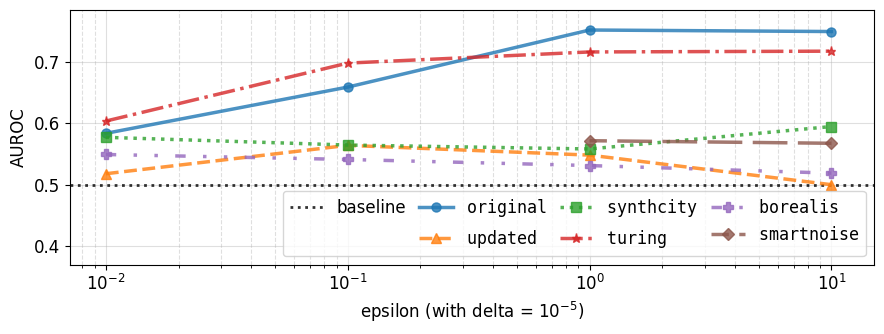

In [77]:
metric = "auroc"


fig, ax = plt.subplots(1, figsize=(9, 3.5), layout='tight', squeeze=True)
alpha = 0.8

ax.axhline(y=data_results["baseline"][metric],
           color='black',
           linestyle=':',
           linewidth=2,
           alpha=alpha,
           label="baseline")

ax.axhline(y=0.1,
           color='white',
           linestyle=':',
           linewidth=2,
           alpha=alpha,
           label=" ")

for pg_name in PATE_GANS.keys():
    ax.plot(MNIST_EPSILONS,
            data_results[pg_name][metric],
            ls=LINES_DICT[pg_name],
            marker=MARKERS_DICT[pg_name],
            color=COLORS_DICT[pg_name],
            linewidth=2.5,
            markersize=6.5,
            label=fix_label(pg_name.split("_")[1]),
            alpha=alpha)

ax.set_xscale("log")
ax.set_xlim(xmax=15)
ax.set_ylim(ymin=y_lim_dict[metric])
# ax.set_ylim(ymin=0)
ax.set_xlabel(r"epsilon (with delta = $10^{-5}$)")
ax.set_ylabel(metric.upper())
ax.grid(True, which="minor", linestyle="dashed", alpha=0.4)
ax.grid(True, which="major", linestyle="-", alpha=0.4)
ax.legend(ncol=4, loc=4, columnspacing=0.8)
# ax.legend(ncol=2, loc=2, columnspacing=0.8)

fig.tight_layout()
# fig.savefig(SAVE_PLOTS_PATH / f"{data_name}_{metric}.pdf", bbox_inches='tight')
fig.show()